# Clasificación de datos 

Importación de las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Creación del diccionario de palabras clave para la clasificación de tweets tanto en inglés como español

In [2]:
stop_words = set(stopwords.words('english'))

In [3]:
stop_words_esp = set(stopwords.words('spanish'))

Creación del dataframe de pandas con el archivo csv obtenido de la traducción del conjunto de datos obtenido

In [4]:
df = pd.read_csv('tweets_traducidos.csv')

Visualización del DataFrame creado

In [5]:
df.head()

,text_original,text_traducido
0,pésima atención al cliente llega pedido incomp...,Lounting customer service arrives incomplete r...
1,asi como me cobran un fee cada que cancelo una...,Just as a Fee charges every time I cancel a ca...
2,sigo esperando respuesta de de por el viaje se...,"I still expect a response from the trip, I hav..."
3,qué es cómo trabajar de,What is how to work on
4,lol honestly winning voting contests is what v...,Lol honestly winning voting answers is what vo...


Obtener la polaridad del texto mediante la librería TextBlob. Se considera que son números de tipo flotante que van de -1 a 1, 0 se considera neutral, si aumenta positivamente el tweet tiende a ser positivo y si decremente se considera negativo 

In [6]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [7]:
df['polarity'] = df['text_traducido'].apply(polarity)

In [8]:
df['polarity'] = df['text_original'].apply(polarity)

Clasificación de los tweets en categorías: positivo, neutral y negativo. Mediante la librería de TextBlob y el dicionario de stop words creados previamente

In [9]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [10]:
df['sentiment'] = df['polarity'].apply(sentiment)

Visualización de la clasificación de los tweet

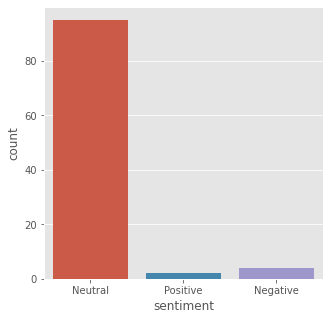

In [11]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

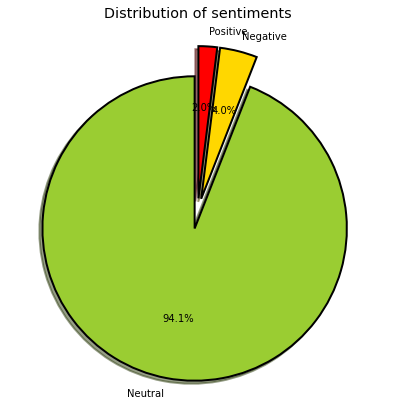

In [12]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

Creación de un archivo csv con los datos previamente clasificados 

In [13]:
df.to_csv("data_label.csv", index=False)
print("Archivos exportados correctamente.")

Archivos exportados correctamente.


Creación de DataFrame con twwwts clasificados positivamente con su respectiva polaridad

In [14]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text_original,text_traducido,polarity,sentiment
4,lol honestly winning voting contests is what v...,Lol honestly winning voting answers is what vo...,0.3375,Positive
45,so why are you going to ecuador today instead ...,So Why are you going to Ecuador Today Instead ...,0.3375,Positive


Nube de palabras con las palabras más frecuentes dentro del DataFrame de tweets positivos

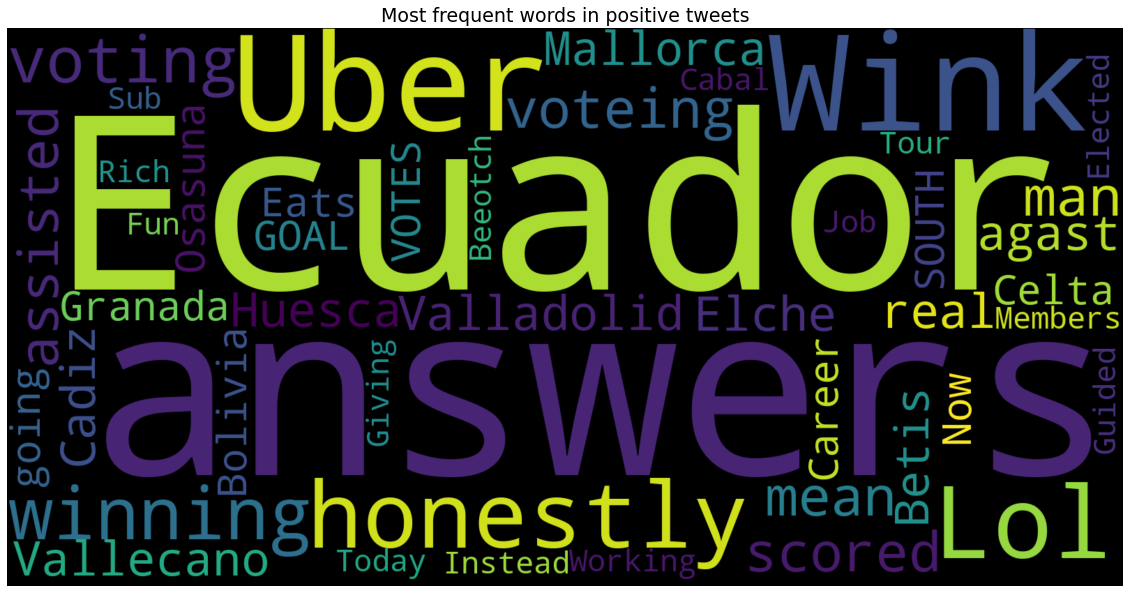

In [15]:
text_traducido = ' '.join([word for word in pos_tweets['text_traducido']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text_traducido)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

Creación de DataFrame con tweets clasificados como negativos con su polaridad

In [16]:
neg_tweets = df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text_original,text_traducido,polarity,sentiment
39,la oferta demanda en taxis esta fechas es inev...,The supply demand in taxis This dates is inevi...,-0.4,Negative
90,es un miserable eso no se hace,It is a miserable that is not done,-1.0,Negative
92,robarle una persona enferma ni siquiera digo a...,Stealing a sick person does not even say frien...,-1.0,Negative
94,que ser para miserable el tipo,what to be miserable the type,-1.0,Negative


Nube de palabras con las palabras más frecuentes dentro del DataFrame con tweets negativos.

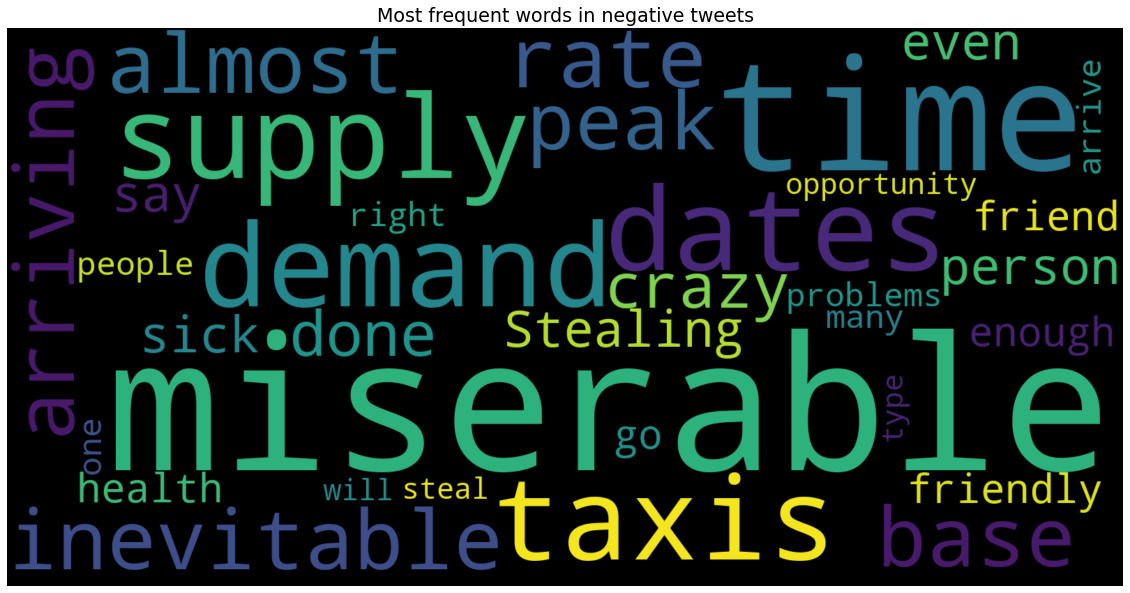

In [17]:
text_traducido = ' '.join([word for word in neg_tweets['text_traducido']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text_traducido)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

Cración de DataFrame con tweets clasificados como neutrales con su respectiva polaridad

In [18]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text_original,text_traducido,polarity,sentiment
0,pésima atención al cliente llega pedido incomp...,Lounting customer service arrives incomplete r...,0.0,Neutral
63,osea en vez de ganar pierdo dinero que no es n...,"I mean instead of winning, I lose money that i...",0.0,Neutral
72,se pasan de hp,They pass from HP,0.0,Neutral
71,dónde pongo una queja con,Where do I put a complaint with,0.0,Neutral
70,no pida tenga en cuenta algo melissa del preci...,Do not ask to take into account something Meli...,0.0,Neutral


Nube de palabras con palabras más frecuentes dentro del DataFrame de tweets neutrales

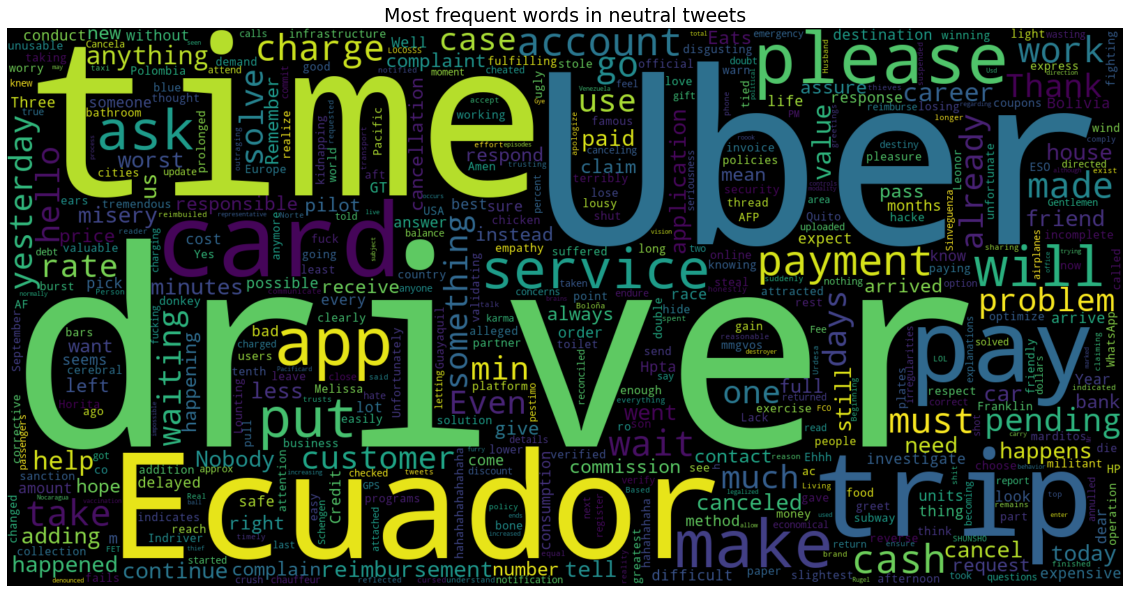

In [19]:
text_traducido = ' '.join([word for word in neutral_tweets['text_traducido']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text_traducido)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

Vectorización de los tweets tanto traducidos al idioma inglés como originales

In [20]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['text_traducido'])

In [21]:
vect_esp = CountVectorizer(ngram_range=(1,2)).fit(df['text_original'])

Creación del conjunto de features con los tweets vectorizados por palabras

In [22]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 2185

First 20 features:
 ['about' 'about his' 'about the' 'ac' 'accept' 'accept card' 'account'
 'account cancel' 'account card' 'account something' 'account was'
 'accounts' 'accounts are' 'adding' 'adding credit' 'adding that'
 'adding uber' 'addition' 'addition the' 'af']


In [23]:
feature_names_esp = vect_esp.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names_esp)))
print("First 20 features:\n {}".format(feature_names_esp[:20]))

Number of features: 2555

First 20 features:
 ['abusan' 'abusan de' 'ac' 'acabo' 'acabo de' 'aceptar' 'aceptar el'
 'actualizan' 'actualizan su' 'adding' 'adding credit' 'además'
 'además la' 'adjunto' 'adjunto detalles' 'af' 'afirmación'
 'afirmación conducta' 'after' 'after few']


In [24]:
X = df['text_traducido']
Y = df['sentiment']
X = vect.transform(X)

In [25]:
X = df['text_original']
Y = df['sentiment']
X = vect_esp.transform(X)

Creación de los sets de entrenamiento como de prueba tomando en cuenta la proporción 80 20

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
xe_train, xe_test, ye_train, ye_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Visualización de los tamñanos de los diferentes sets de entrenamiento y de prueba

In [28]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (80, 2555)
Size of y_train: (80,)
Size of x_test: (21, 2555)
Size of y_test: (21,)


In [29]:
import warnings
warnings.filterwarnings('ignore')

Creación de diferentes algoritmos de clasificación para el entrenamiento de los mismos con los sets de datos creados anteriormente

Algoritmo de regresión logística

In [30]:
logreg = LogisticRegression()
logreg.fit(xe_train, ye_train)
logreg_pred = logreg.predict(xe_test)
logreg_acc = accuracy_score(logreg_pred, ye_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.71%


Matriz de confusión del algoritmo de regresión logística

In [31]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 0  1  0]
 [ 0 18  0]
 [ 0  2  0]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.86      1.00      0.92        18
    Positive       0.00      0.00      0.00         2

    accuracy                           0.86        21
   macro avg       0.29      0.33      0.31        21
weighted avg       0.73      0.86      0.79        21



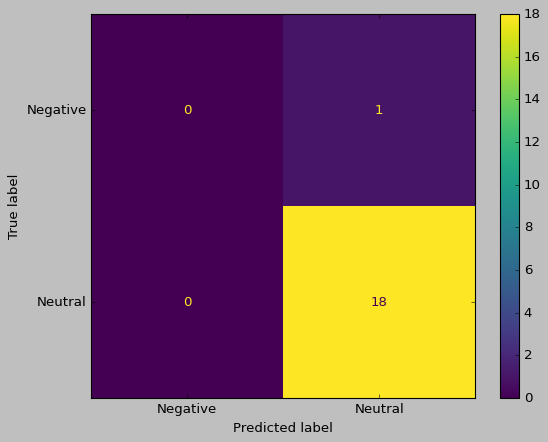

In [32]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [35]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 0.001}


In [36]:
y_pred = grid.predict(x_test)

In [37]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.71%


In [38]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 0  1  0]
 [ 0 18  0]
 [ 0  2  0]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.86      1.00      0.92        18
    Positive       0.00      0.00      0.00         2

    accuracy                           0.86        21
   macro avg       0.29      0.33      0.31        21
weighted avg       0.73      0.86      0.79        21



In [39]:
logreg = LogisticRegression()
logreg.fit(xe_train, ye_train)
logreg_pred = logreg.predict(xe_test)
logreg_acc = accuracy_score(logreg_pred, ye_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.71%
